In [1321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [1322]:
data = pd.read_csv('D:\maks\lab4\wine.csv')

In [1323]:
# Дан датасет “wine.csv”. Он состоит из 178 строк(наблюдений) и 14 столбцов (признаков\переменных). 
# Задача состоит в том, чтобы определить количество кластеров методом k-mean (k-средних).

In [1324]:
def heat(data):
    '''матрица корреляций, посмотреть какие признаки коррелируют друг с другом'''
    corr = data.corr()
    f,ax = plt.subplots(figsize = (10,10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr,annot=True,cmap = cmap)

def pca_2d(X,rank = None):
    '''использует PCA для усечения размерности до 2 главных компонент'''
    model_pca = PCA(n_components=2,random_state=2).fit(X)
    model_pca = model_pca.transform(X)
    f = plt.figure(figsize=(6,6))
    sns.scatterplot(model_pca[:,0], model_pca[:,1],hue = rank)
    
def check_clusters(X,klusters):
    '''Показывает график сум квадратов ошибки (отклонения\растояние) от центроидов'''
    sse = []
    for k in range(1,klusters):
        km = KMeans(n_clusters = k,random_state=2)
        km.fit(X_std)
        sse.append(km.inertia_)
    return sse, klusters

def sample_mean(sample):
    '''Центральная тенденция каждого из параметров в выборке (кластере)'''
    sample_var_mean = []
    for col in sample.columns:
        col = sample[col]
        sample_var_mean.append(col.mean())
    return sample_var_mean



In [1325]:
# Так как дана задача выполнить кластеризацию алгоритмом k-mean, то нужно подготовить данные для 
# алгоритма. Во первых из сета было бы не плохо удалить признак Class – который уже классифицирует вина.
# Такой признак является неуместным для данной задачи(кластеризации)

In [1326]:
X = data.loc[:,'Alcohol':'Proline'] # признак "Class" не входит в независиммые признаки(сичитается своего рода подсказкой для модели), считаю что он не должен учавтсвовать в задаче кластеризации
rank = data.loc[:,'Class']
X

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [1327]:
# От сюда же видим, что все переменные являются непрерывными, 
# значит преобразовывать пока ничего не нужно 
# (в отличии от случая, когда переменные являются строками).

In [1328]:
# Так же с помощью heatmap можно убедиться, что нету утерянных данных 
# (в случае наличия таковых - некоторые из клеток будут не закрашены - белые). 

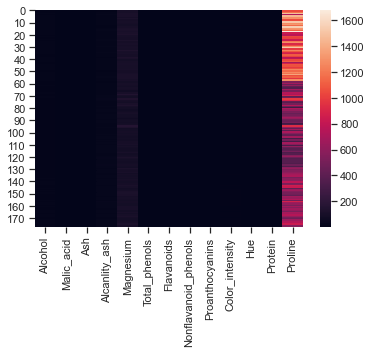

In [1329]:
sns.heatmap(X)

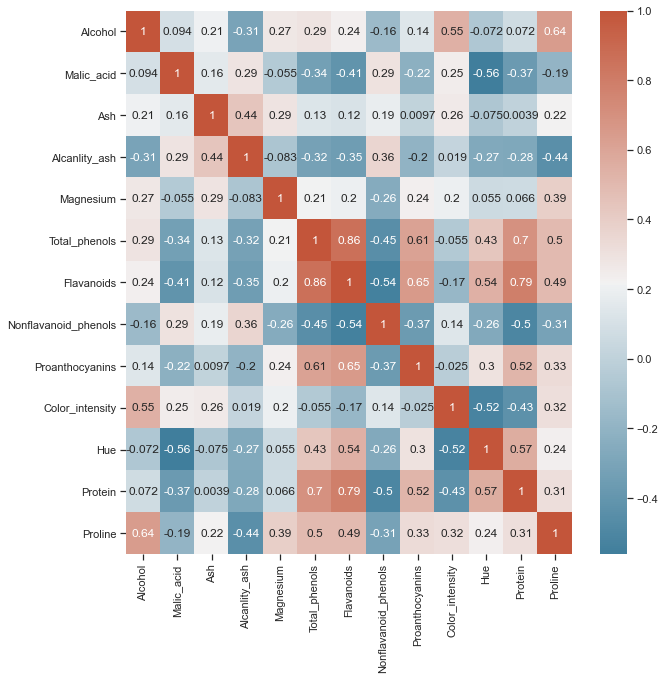

In [1330]:
# Так же, для анализа данных можно построить матрицу рассеяний, 
# но она строится очень долго для высокоразмерных данных, а так же не будет являться репрезентативной 
# (слишком много двумерных графиков корреляций получается, что тяжело изучать). 
# Вместо этого можно построить матрицу корреляций на основе heatmap 
# (на которой показана картина корреляций признаков друг с другом), 
# но по сути она не облегчает процесс.
heat(X)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


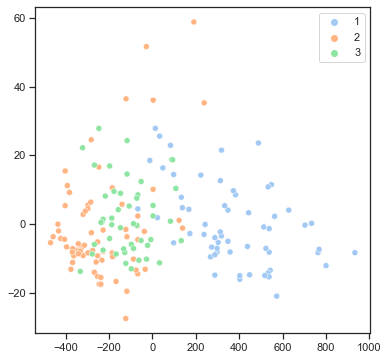

In [1331]:
# В случаях высокоразмерных данных уменьшают количество признаков (до 2 в данном случае) 
# с целью, чтобы наглядно показать распределение точек данных в 2-мерном пространстве.
# Для этого можно использовать PCA (Principal Component Analysis). 
# В результате можно увидеть следующее распределение точек данных и их классификации: 
rank = [str(x) for x in rank]
pca_2d(X, rank)

In [1332]:
# Видно, кластеры довольно сильно смешаны, если подать такой набор данных в k-mean, 
# то алоритм, возможно, не совсем точно сможет кластеризовать данные 
# (даже не принимая во внимание что сам алгоритм не самый точный и испытывает проблемы в 
# случае сложных, но очевидных для человека данных). 
# Результат кластеризации на данный момент: 

In [1333]:
# кластеризация без нормализации (на данный момент на 3 кластера)
model = KMeans(n_clusters=3,random_state=2)
model = model.fit(X)
model.predict(X)

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


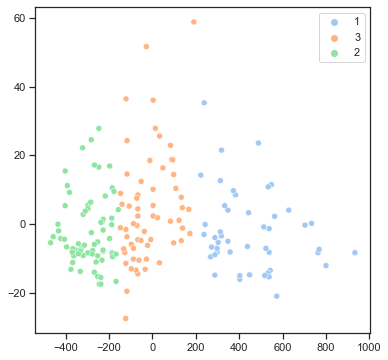

In [1334]:
# результат кластеризации наглядно
pca_2d(X,[str(x+1) for x in model.labels_])

In [1335]:
# Очевидно, что k-mean не справляется с кластеризацией на должном уровне, 
# но к счастью ему можно помочь. 
# Для этого можно сделать нормализацию входных данных, но каким методом?
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


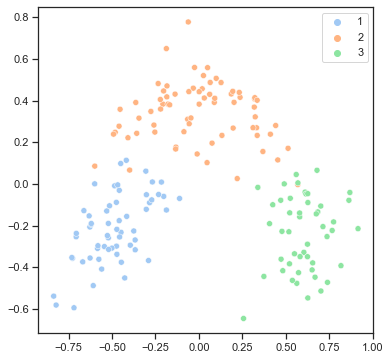

In [1336]:
# MinMaxScaler - сдвигает данные таким образом, чтобы все признаки находились строго в диапазоне от 0 до 1
scaler = MinMaxScaler()
X_std = scaler.fit(X).transform(X)
pca_2d(X_std,rank)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


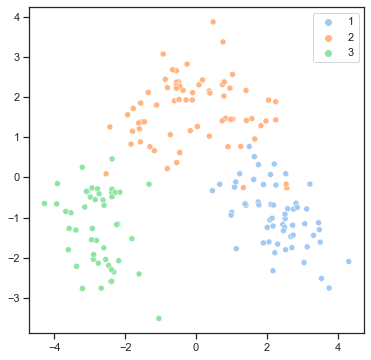

In [1337]:
# StandardScaler - гарантирует, что для каждого признака среднее будет равно 0, а дисперсия равна 1,
# в результате чего все признаки будут иметь один и тот же масштаб
scaler = StandardScaler()
X_std = scaler.fit(X).transform(X)
pca_2d(X_std,rank)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


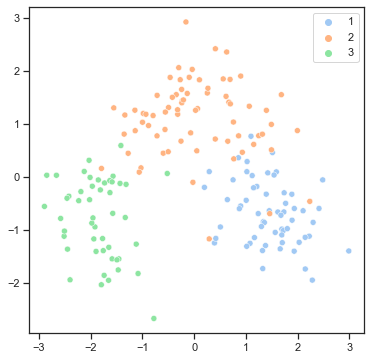

In [1338]:
# RobustScaler - аналогичен StandardScaler в том плане, что в результате признаки будут иметь
# один и тот же масштаб, однако вмесо среднего и дисперсии использует медиану и квартели (25%-75%),
# так как метрики используемые в этом методе более робастны (нечувствительны к выбросам) от сюда и название
scaler = RobustScaler()
X_std = scaler.fit(X).transform(X)
pca_2d(X_std,rank)

In [1339]:
# Исходя из анализа нормализации, можно сделать вывод, что все 3 метода неплохо преобразуют данные
# но всё же с некоторыми погрешностями

Text(0, 0.5, 'Sum of squared distance/error')

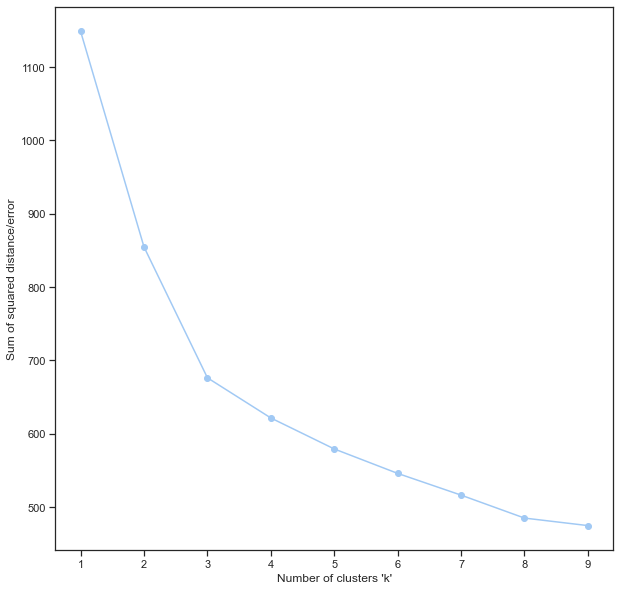

In [1340]:
# Но все еще остается вопрос, какое количество кластеров оптимально для данной совокупности
sse, klusters =check_clusters(X,10)
plt.figure(figsize=(10, 10))
plt.plot(range(1,klusters), sse,'-o')
plt.xlabel("Number of clusters 'k'")
plt.ylabel('Sum of squared distance/error')

In [1341]:
# Из графика видно, что оптимальное число кластеров равно 3 (как и было изначально), 
# т.к. для последующих SSE уменьшается незначительно и почи под одинаковым углом

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


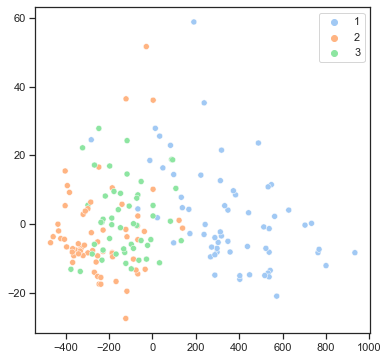

In [1342]:
# Смотрим результат кластеризации на 3 кластера методом k-mean 
# на основе предварительно нормализированых данных:
scaler = StandardScaler()
X_std = scaler.fit(X).transform(X)

# модель k-mean
model = KMeans(n_clusters = 3,random_state=2)
model = model.fit(X_std)
model.predict(X_std)

# распределение
pca_2d(X, [str(x+1) for x in model.labels_])


In [1343]:
model = KMeans(n_clusters = 3,random_state=2)
model = model.fit(X_std)
model.predict(X_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [1344]:
# очень похоже на изначальное

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


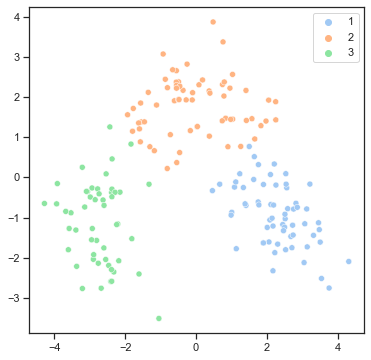

In [1345]:
# усеченное до 2 компонент
pca_2d(X_std,[str(x+1) for x in model.labels_])

In [1346]:
# оценка качества кластеризации на основе истинных меток
from sklearn.metrics.cluster import adjusted_rand_score
X,y = new_data.iloc[:,:-1], data['Class']
adjusted_rand_score(y,new_data['Class'])

0.8974949815093207

In [1347]:
# Разница в распределении точек между изначальным набором и преобразованым не столь очевидна.
# Однако в чем различия между самими группами наблюдений?
# Так как у нас 3 группы и нету заметных выбросов, то можно провести дисперсионный (параметрический) анализ. 
# Нулевая гипотиза говорит о том,что группы ничем не отличаются друг от друга, 
# альтернативная - хотя бы одна группа отличается от остальных (и это заметно)
# 


In [1348]:
new_data = pd.DataFrame(X_std,columns=new_data.columns[:-1])
new_data['Class'] = [x+1 for x in model.labels_]
#new_data = X
var_min = []
var_max = []

for col in new_data.columns:
    col = new_data[col]
    var_min.append(min(col))
    var_max.append(max(col))

new_data['Class'] = [x+1 for x in model.labels_]

In [1349]:
# наиболее типичные значения каждого признака для каждого класса (среднее арифм.), 
# минимальное значение, максимальное значение

In [1350]:
sample_1 = new_data[new_data['Class'] == 1]
sample_1_var_mean = sample_mean(sample_1.iloc[:,:-1])

In [1351]:
sample_2 = new_data[new_data['Class'] == 2]
sample_2_var_mean = sample_mean(sample_2.iloc[:,:-1])

In [1352]:
sample_3 = new_data[new_data['Class'] == 3]
sample_3_var_mean = sample_mean(sample_3.iloc[:,:-1])

In [1353]:
tend = list(zip(var_min,sample_1_var_mean,sample_2_var_mean,sample_3_var_mean,var_max))
tend = np.matrix(tend).T
tend_df = pd.DataFrame(tend,index=['min','sample 1', 'sample 2', 'sample 3', 'max'], columns=[new_data.columns[:-1]])
tend_df

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
min,-2.434235,-1.432983,-3.679162,-2.671018,-2.088255,-2.107246,-1.695971,-1.868234,-2.069034,-1.634288,-2.094732,-1.895054,-1.493188
sample 1,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
sample 2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
sample 3,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
max,2.259772,3.109192,3.156325,3.154511,4.371372,2.539515,3.062832,2.402403,3.485073,3.435432,3.301694,1.960915,2.971473


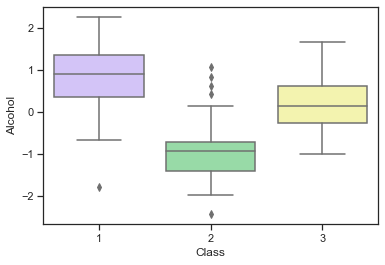

In [1354]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Class", y="Alcohol",
            palette=["m", "g","y"],
            data=new_data)

In [1355]:
new_data

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline,Class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


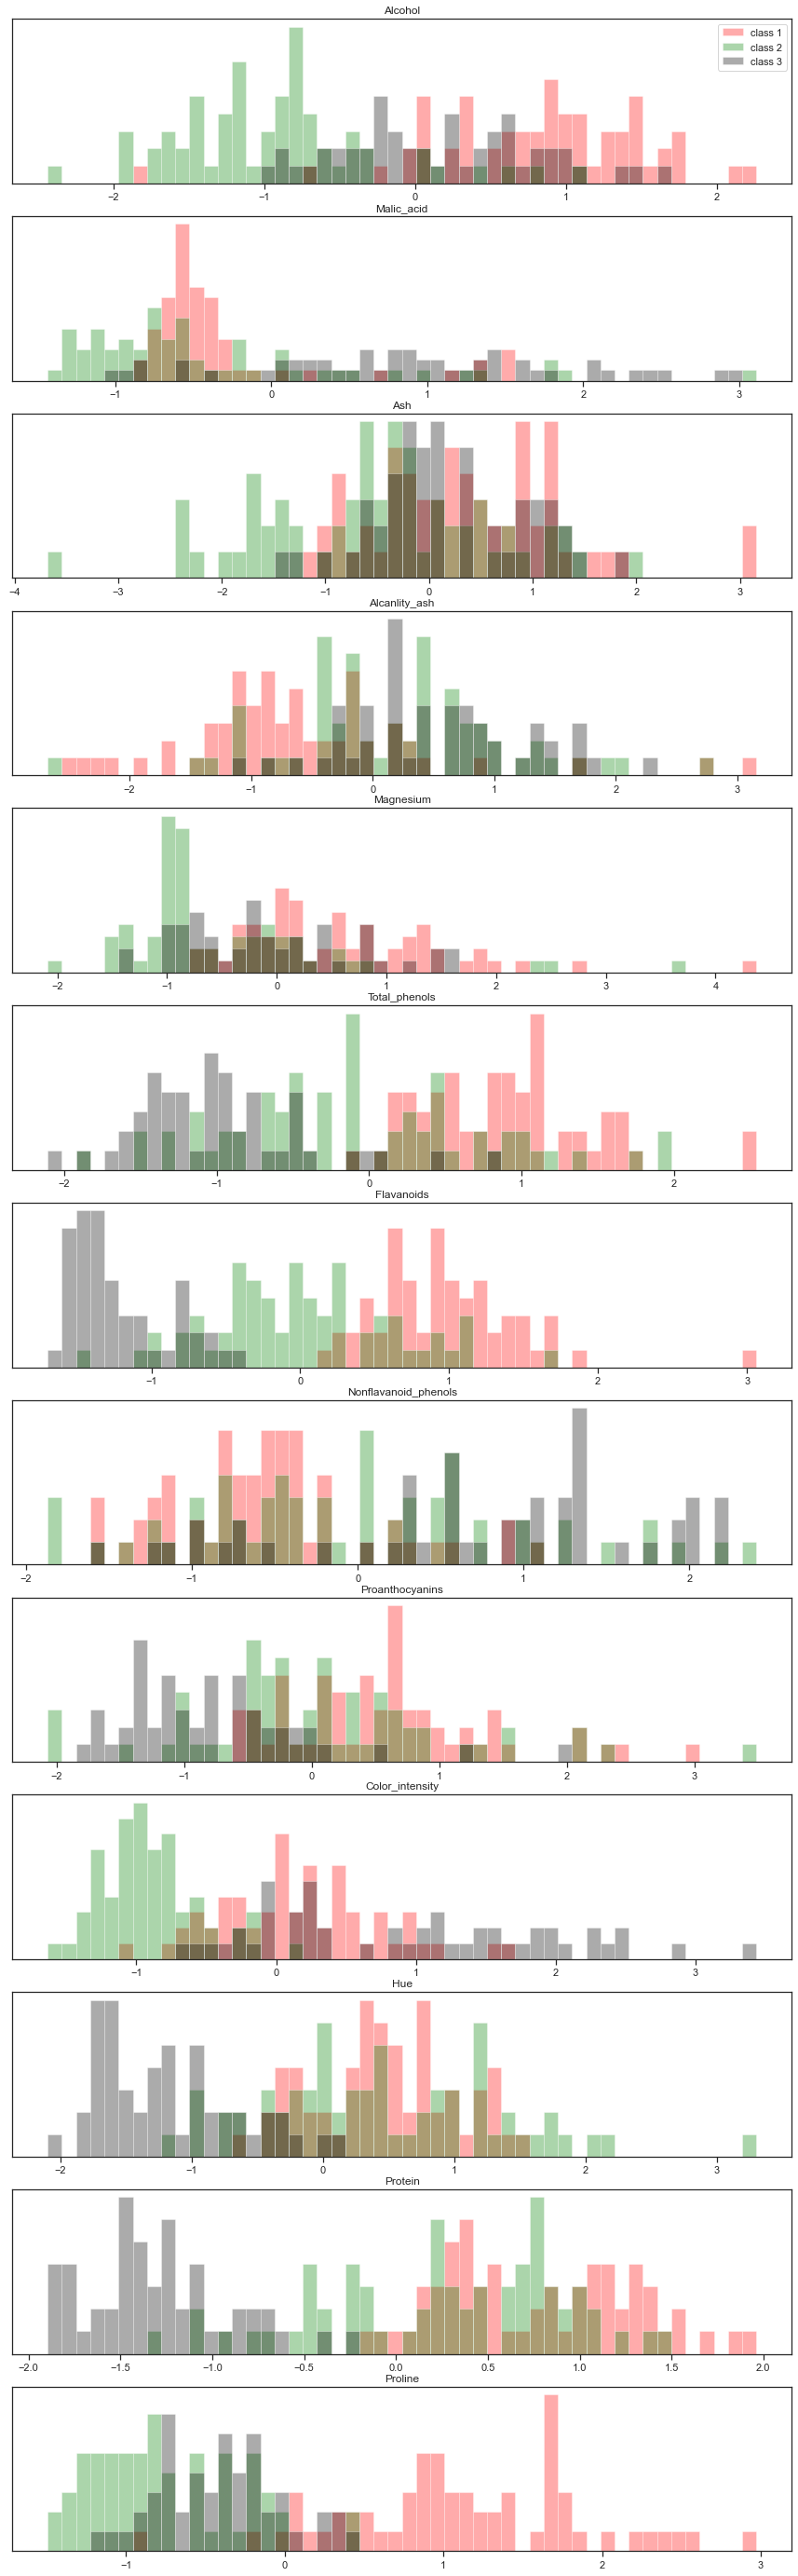

In [1356]:

fig, axes = plt.subplots(13,figsize=(15,50))
class_1 = new_data[new_data.Class == 1]
class_2 = new_data[new_data.Class == 2]
class_3 = new_data[new_data.Class == 3]
ax = axes.ravel()

for i in range(13):
    _, bins = np.histogram(new_data.iloc[:,i],bins = 50)
    ax[i].hist(class_1.iloc[:,i],bins = bins,color = 'red',alpha = 0.33)
    ax[i].hist(class_2.iloc[:,i],bins = bins,color = 'green',alpha = 0.33)
    ax[i].hist(class_3.iloc[:,i],bins = bins,color = 'black',alpha = 0.33)
    
    ax[i].set_title(new_data.columns[i])
    ax[i].set_yticks(())
ax[0].set_xlabel = ("Значение признака")
ax[0].set_xlabel = ("Частота")
ax[0].legend(['class 1','class 2','class 3'],loc='best')

In [1357]:
sample_1 = sample_1.iloc[:,:-1]
sample_2 = sample_2.iloc[:,:-1]
sample_3 = sample_3.iloc[:,:-1]

model_class_1_pca = PCA(n_components=2,random_state=2).fit(sample_1)
class_1_pca = model_pca.transform(sample_1)
model_class_1_pca.components_

model_class_2_pca = PCA(n_components=2,random_state=2).fit(sample_2)
class_2_pca = model_pca.transform(sample_2)
model_class_2_pca.components_

model_class_3_pca = PCA(n_components=2,random_state=2).fit(sample_3)
class_3_pca = model_pca.transform(sample_3)
model_class_3_pca.components_

array([[ 0.2201249 , -0.16594284,  0.28794196,  0.28714719,  0.218181  ,
         0.2077691 ,  0.08287405, -0.07584897,  0.4268259 ,  0.65705186,
        -0.18884783, -0.04686174,  0.0591166 ],
       [-0.13788087, -0.34681315, -0.05612853, -0.08785522,  0.42284183,
        -0.17581745,  0.12820114, -0.75910486, -0.15858921, -0.0799864 ,
        -0.03723443, -0.11587937, -0.03309153]])

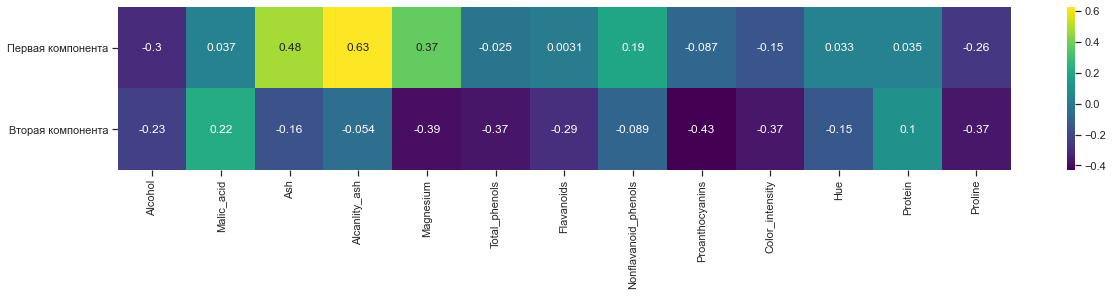

In [1358]:
f,ax = plt.subplots(figsize = (20,3))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.DataFrame(model_class_1_pca.components_,index=['Первая компонента','Вторая компонента'],columns=new_data.columns[:-1]),cmap='viridis',annot=True)

In [1359]:
tend_df

,Alcohol,Malic_acid,Ash,Alcanlity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein,Proline
min,-2.434235,-1.432983,-3.679162,-2.671018,-2.088255,-2.107246,-1.695971,-1.868234,-2.069034,-1.634288,-2.094732,-1.895054,-1.493188
sample 1,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
sample 2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
sample 3,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
max,2.259772,3.109192,3.156325,3.154511,4.371372,2.539515,3.062832,2.402403,3.485073,3.435432,3.301694,1.960915,2.971473


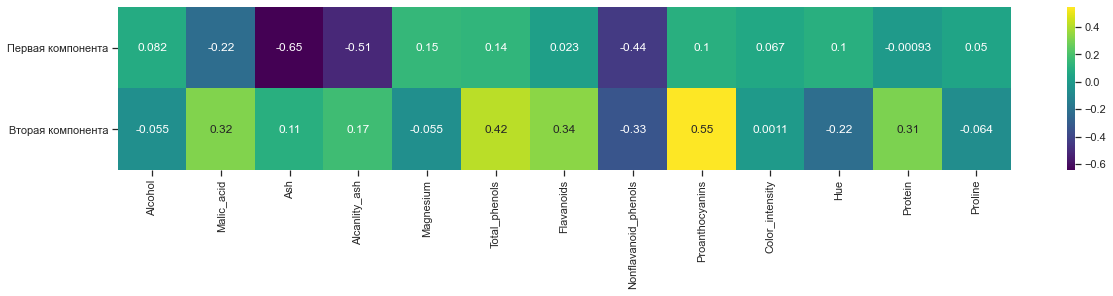

In [1360]:
f,ax = plt.subplots(figsize = (20,3))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.DataFrame(model_class_2_pca.components_,index=['Первая компонента','Вторая компонента'],columns=new_data.columns[:-1]),cmap='viridis',annot=True)

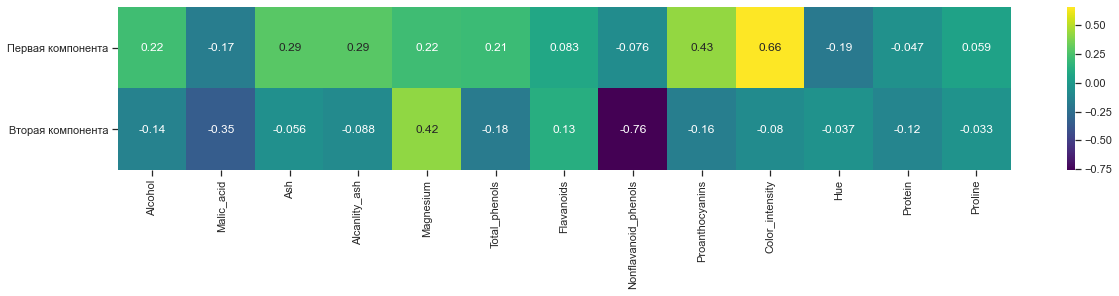

In [1361]:
f,ax = plt.subplots(figsize = (20,3))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.DataFrame(model_class_3_pca.components_,index=['Первая компонента','Вторая компонента'],columns=new_data.columns[:-1]),cmap='viridis',annot=True)
#lt.xticks(range(len(sample_3.columns)),sample_3.columns,rotation=45,ha='left')


In [1362]:
# дисперсионный анализ показывает признаки которые наиболее сильно влияют на классификацию (получаемый класс)
# 1 - Сильно влияет 
# 0 - Не сильно влияет

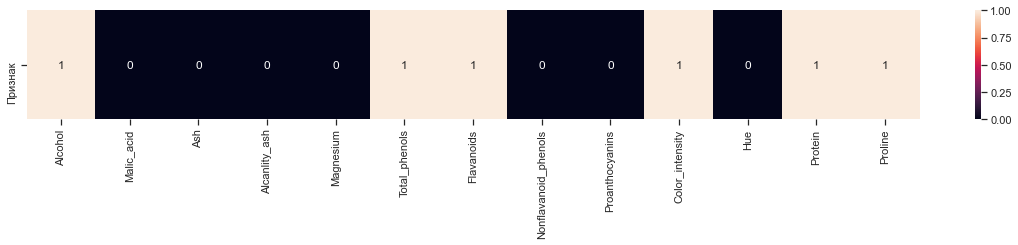

In [1363]:
from sklearn.feature_selection import SelectPercentile
X_train, X_test, y_train, y_test = train_test_split(new_data.iloc[:,:-1], new_data['Class'], test_size=0.33, random_state=2)
select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
mask = select.get_support()

f,ax = plt.subplots(figsize = (20,2))
cmap = sns.diverging_palette(20, 2, as_cmap=True)
df_cols = pd.DataFrame(mask.reshape(1,-1),columns=new_data.columns[:-1],index = ['Признак'])
sns.heatmap(df_cols,annot=True)

In [1364]:
# на основе этих признаков можно построить матрицу рассеяний (она будет более информативна
# неже ли матрица построенная на основе всех признаков, за счет того что ее как минимум легче читать)

In [1365]:
used_classes = [1,2,3]
used_cols = [x for i,x in enumerate(df_cols.columns) if df_cols.iloc[0,i] == True]
used_cols.append('Class')
df = new_data.loc[:,used_cols]

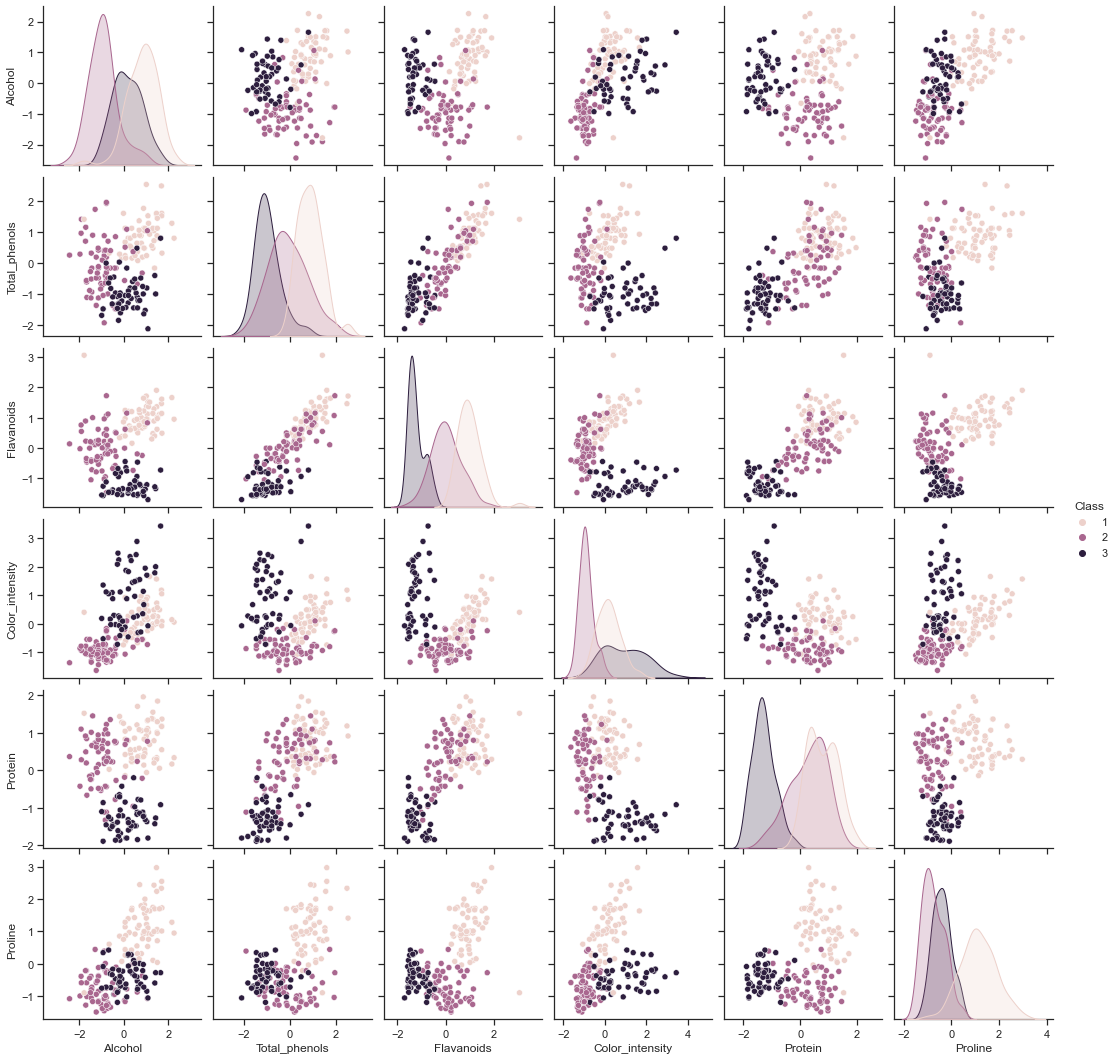

In [1366]:
sns.pairplot(df,hue='Class')